# Импорты

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных

In [2]:
dir = 'D:/Книги/Программирование/ML_contests_хакатоны/data_secrets_first_cup/'

# Трейны, предпочтительны train_features_target_clean или train_features_target_filled
# train_features_target_clean = pd.read_csv(dir + 'train_features_target.csv')
# train_features_target_clean = pd.read_csv(dir + 'train_features_target_clean.csv')
train_features_target_clean = pd.read_csv(dir + 'train_features_target_filled.csv')
# Тесты, предпочтителен test_features_filled
# test_features_filled = pd.read_csv(dir + 'test_features.csv')
test_features_filled = pd.read_csv(dir + 'test_features_filled.csv')
# Помошник для разделения test-файла на подвыборки для разных моделей
# test_ids_with_filter = pd.read_csv(dir + 'test_ids_with_filter.csv')

# EDA, One-hot encoding и другие изменения

In [3]:
# sns.pairplot(train_features_target_clean)  # Очень долго

In [4]:
train_features_target_clean.describe()

,Id,OrderType,apply_promo,DiscountPercentPromo,MedianDiscountPercentNovemberPromo,MaxDiscountPercentNovemberPromo,AvgDisc,MaxDisc,NewClient1,OrderMedianPrice,...,addressIdMain,deliverySectorIdMain,ClientOrderMaxNumber,CategoryIdMain,OrderTypeMain,WeekBalance,PlatformMain,ApplyedPromoBalance,MedianDiscountPercentPromo,MaxDiscountPercentPromo
count,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,...,2.774100e+04,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000
mean,6.089831,1.585956,0.029811,17.479973,17.479973,20.832375,162.694928,194.776144,0.003893,952.090101,...,2.422997e+04,7.155690,48.390577,1.626473,1.207491,0.333762,0.747233,0.140397,12.664356,25.205737
std,0.861960,0.492565,0.170070,9.066232,7.489770,7.546295,69.018342,74.728024,0.062275,922.479219,...,5.763461e+05,177.561553,36.940131,1.186586,0.609812,0.154723,0.434606,0.169384,5.561731,1.737445
min,5.000000,1.000000,0.000000,1.200961,1.200961,1.200961,15.000000,15.000000,0.000000,0.000000,...,0.000000e+00,0.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.053741,1.668057
25%,5.000000,1.000000,0.000000,14.299333,11.676898,20.016013,115.000000,200.000000,0.000000,873.000000,...,0.000000e+00,0.000000,38.000000,1.000000,1.000000,0.303571,0.000000,0.063830,11.343120,25.031289
50%,6.000000,2.000000,0.000000,20.016013,20.522050,25.031289,200.000000,200.000000,0.000000,907.000000,...,0.000000e+00,0.000000,41.000000,1.000000,1.000000,0.322581,1.000000,0.093750,13.678500,25.031289
75%,7.000000,2.000000,0.000000,25.031289,22.525655,25.031289,225.000000,250.000000,0.000000,943.000000,...,0.000000e+00,0.000000,44.000000,2.000000,1.000000,0.344262,1.000000,0.117647,15.806112,25.031289
max,7.000000,2.000000,1.000000,35.335689,33.388982,35.335689,300.000000,300.000000,1.000000,99418.000000,...,1.809301e+07,6571.000000,944.000000,7.000000,3.000000,1.000000,1.000000,1.000000,26.820531,35.335689


In [5]:
train_features_target_clean.apply_promo.value_counts()

apply_promo
0    26914
1      827
Name: count, dtype: int64

In [6]:
train_features_target_clean.columns

Index(['Id', 'OrderType', 'apply_promo', 'DiscountPercentPromo',
       'MedianDiscountPercentNovemberPromo', 'MaxDiscountPercentNovemberPromo',
       'AvgDisc', 'MaxDisc', 'NewClient1', 'OrderMedianPrice',
       'OrderMeanPrice', 'OrderMinPrice', 'OrderMaxPrice',
       'MedianDiscountPercent', 'ProductUUIdCount', 'ProductUUIdMedian',
       'addressIdMain', 'deliverySectorIdMain', 'ClientOrderMaxNumber',
       'CategoryIdMain', 'OrderTypeMain', 'WeekBalance', 'PlatformMain',
       'ApplyedPromoBalance', 'MedianDiscountPercentPromo',
       'MaxDiscountPercentPromo'],
      dtype='object')

<Axes: xlabel='apply_promo', ylabel='addressIdMain'>

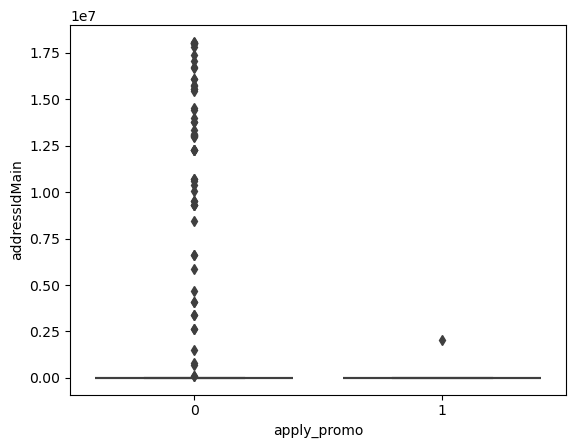

In [7]:
sns.boxplot(x='apply_promo', y='addressIdMain', data=train_features_target_clean)

In [8]:
filtered_train_features_target_clean = train_features_target_clean[train_features_target_clean['apply_promo'] == 1]
filtered_train_features_target_clean.addressIdMain.unique()

array([      0., 2010015.])

In [9]:
filtered_train_features_target_clean.addressIdMain.nunique()

2

In [10]:
filtered_train_features_target_clean.addressIdMain.value_counts()

addressIdMain
0.0          826
2010015.0      1
Name: count, dtype: int64

In [11]:
# ни на что не влияет, можно отбросить эту фичу, или не менять вовсе

In [12]:
train_features_target_clean.columns

Index(['Id', 'OrderType', 'apply_promo', 'DiscountPercentPromo',
       'MedianDiscountPercentNovemberPromo', 'MaxDiscountPercentNovemberPromo',
       'AvgDisc', 'MaxDisc', 'NewClient1', 'OrderMedianPrice',
       'OrderMeanPrice', 'OrderMinPrice', 'OrderMaxPrice',
       'MedianDiscountPercent', 'ProductUUIdCount', 'ProductUUIdMedian',
       'addressIdMain', 'deliverySectorIdMain', 'ClientOrderMaxNumber',
       'CategoryIdMain', 'OrderTypeMain', 'WeekBalance', 'PlatformMain',
       'ApplyedPromoBalance', 'MedianDiscountPercentPromo',
       'MaxDiscountPercentPromo'],
      dtype='object')

<Axes: xlabel='apply_promo', ylabel='deliverySectorIdMain'>

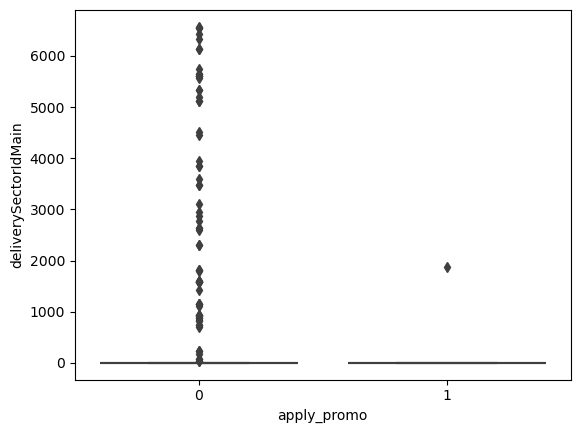

In [13]:
sns.boxplot(x='apply_promo', y='deliverySectorIdMain', data=train_features_target_clean)

In [14]:
print(filtered_train_features_target_clean.deliverySectorIdMain.unique(), filtered_train_features_target_clean.deliverySectorIdMain.value_counts())

[   0. 1872.] deliverySectorIdMain
0.0       826
1872.0      1
Name: count, dtype: int64


In [15]:
# Какая-то аномалия, можно отбросить

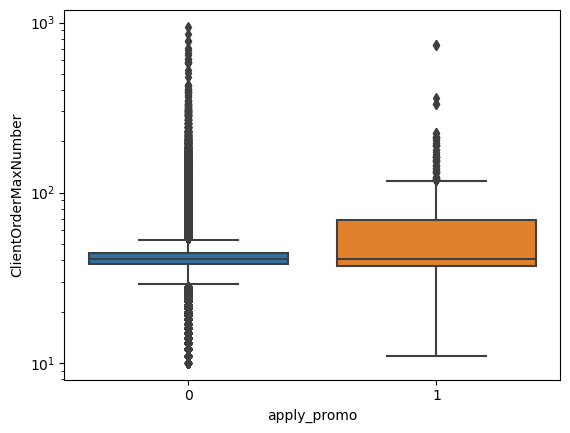

In [16]:
sns.boxplot(x='apply_promo', y='ClientOrderMaxNumber', data=train_features_target_clean)
plt.yscale('log')

In [17]:
promo_yes_train_features_target_clean = train_features_target_clean[train_features_target_clean['apply_promo'] == 1]
promo_yes_train_features_target_clean.OrderTypeMain.unique()

array([1., 3.])

In [18]:
promo_no_train_features_target_clean = train_features_target_clean[train_features_target_clean['apply_promo'] == 0]
promo_no_train_features_target_clean.OrderTypeMain.unique()  # Заказ второго типа не был встречен в случаях успешного apply_promo

array([1., 3., 2.])

### Выделяем новый признак - нет заказа тип 2

In [19]:
# Не забудем подставить датасет
train_dataset = train_features_target_clean.copy()
train_dataset.columns

Index(['Id', 'OrderType', 'apply_promo', 'DiscountPercentPromo',
       'MedianDiscountPercentNovemberPromo', 'MaxDiscountPercentNovemberPromo',
       'AvgDisc', 'MaxDisc', 'NewClient1', 'OrderMedianPrice',
       'OrderMeanPrice', 'OrderMinPrice', 'OrderMaxPrice',
       'MedianDiscountPercent', 'ProductUUIdCount', 'ProductUUIdMedian',
       'addressIdMain', 'deliverySectorIdMain', 'ClientOrderMaxNumber',
       'CategoryIdMain', 'OrderTypeMain', 'WeekBalance', 'PlatformMain',
       'ApplyedPromoBalance', 'MedianDiscountPercentPromo',
       'MaxDiscountPercentPromo'],
      dtype='object')

In [20]:
train_dataset

,Id,OrderType,apply_promo,DiscountPercentPromo,MedianDiscountPercentNovemberPromo,MaxDiscountPercentNovemberPromo,AvgDisc,MaxDisc,NewClient1,OrderMedianPrice,...,addressIdMain,deliverySectorIdMain,ClientOrderMaxNumber,CategoryIdMain,OrderTypeMain,WeekBalance,PlatformMain,ApplyedPromoBalance,MedianDiscountPercentPromo,MaxDiscountPercentPromo
0,7,2,0,28.612303,15.306952,28.612303,112.5,200,0.0,420.0,...,0.0,0.0,118.0,1.0,1.0,0.060606,1.0,0.000000,2.682180,25.031289
1,6,1,0,2.001601,15.306952,28.612303,112.5,200,0.0,420.0,...,0.0,0.0,118.0,1.0,1.0,0.060606,1.0,0.000000,2.682180,25.031289
2,5,2,0,25.031289,22.523651,25.031289,225.0,250,0.0,907.0,...,0.0,0.0,41.0,1.0,1.0,0.322581,1.0,0.093750,13.678500,25.031289
3,5,1,0,20.016013,22.523651,25.031289,225.0,250,0.0,907.0,...,0.0,0.0,41.0,1.0,1.0,0.322581,1.0,0.093750,13.678500,25.031289
4,6,2,0,4.291845,12.153929,20.016013,140.0,250,0.0,907.0,...,0.0,0.0,41.0,1.0,1.0,0.322581,1.0,0.093750,13.678500,25.031289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27736,5,2,0,25.031289,22.523651,25.031289,225.0,250,0.0,1806.0,...,0.0,0.0,13.0,1.0,3.0,0.238095,0.0,0.238095,2.503129,25.031289
27737,5,1,0,20.016013,22.523651,25.031289,225.0,250,0.0,1806.0,...,0.0,0.0,13.0,1.0,3.0,0.238095,0.0,0.238095,2.503129,25.031289
27738,6,2,0,2.503129,2.503129,2.503129,20.0,20,0.0,907.0,...,0.0,0.0,41.0,1.0,1.0,0.322581,1.0,0.093750,13.678500,25.031289
27739,5,2,0,26.702270,23.359141,26.702270,225.0,250,0.0,907.0,...,0.0,0.0,41.0,1.0,1.0,0.322581,1.0,0.093750,13.678500,25.031289


In [21]:
train_dataset.apply_promo.value_counts()

apply_promo
0    26914
1      827
Name: count, dtype: int64

In [22]:
def check_not_two(value):
    # Если значение является числом
    if isinstance(value, float) and value == 2.0:
        return 0
    return 1

In [23]:
train_dataset['OrderTypeMainNotTwo'] = train_dataset['OrderTypeMain'].apply(check_not_two)

In [24]:
train_dataset

,Id,OrderType,apply_promo,DiscountPercentPromo,MedianDiscountPercentNovemberPromo,MaxDiscountPercentNovemberPromo,AvgDisc,MaxDisc,NewClient1,OrderMedianPrice,...,deliverySectorIdMain,ClientOrderMaxNumber,CategoryIdMain,OrderTypeMain,WeekBalance,PlatformMain,ApplyedPromoBalance,MedianDiscountPercentPromo,MaxDiscountPercentPromo,OrderTypeMainNotTwo
0,7,2,0,28.612303,15.306952,28.612303,112.5,200,0.0,420.0,...,0.0,118.0,1.0,1.0,0.060606,1.0,0.000000,2.682180,25.031289,1
1,6,1,0,2.001601,15.306952,28.612303,112.5,200,0.0,420.0,...,0.0,118.0,1.0,1.0,0.060606,1.0,0.000000,2.682180,25.031289,1
2,5,2,0,25.031289,22.523651,25.031289,225.0,250,0.0,907.0,...,0.0,41.0,1.0,1.0,0.322581,1.0,0.093750,13.678500,25.031289,1
3,5,1,0,20.016013,22.523651,25.031289,225.0,250,0.0,907.0,...,0.0,41.0,1.0,1.0,0.322581,1.0,0.093750,13.678500,25.031289,1
4,6,2,0,4.291845,12.153929,20.016013,140.0,250,0.0,907.0,...,0.0,41.0,1.0,1.0,0.322581,1.0,0.093750,13.678500,25.031289,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27736,5,2,0,25.031289,22.523651,25.031289,225.0,250,0.0,1806.0,...,0.0,13.0,1.0,3.0,0.238095,0.0,0.238095,2.503129,25.031289,1
27737,5,1,0,20.016013,22.523651,25.031289,225.0,250,0.0,1806.0,...,0.0,13.0,1.0,3.0,0.238095,0.0,0.238095,2.503129,25.031289,1
27738,6,2,0,2.503129,2.503129,2.503129,20.0,20,0.0,907.0,...,0.0,41.0,1.0,1.0,0.322581,1.0,0.093750,13.678500,25.031289,1
27739,5,2,0,26.702270,23.359141,26.702270,225.0,250,0.0,907.0,...,0.0,41.0,1.0,1.0,0.322581,1.0,0.093750,13.678500,25.031289,1


<Axes: xlabel='apply_promo', ylabel='MedianDiscountPercent'>

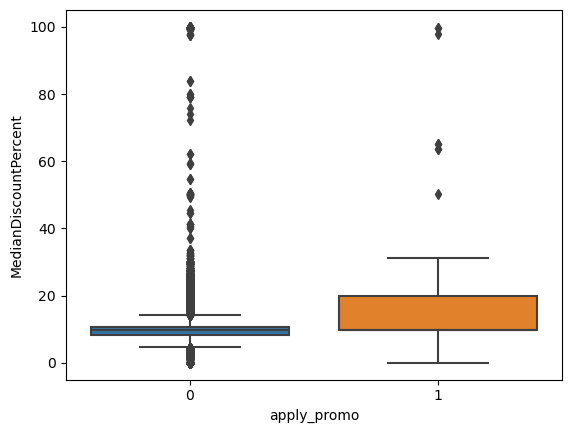

In [25]:
sns.boxplot(x='apply_promo', y='MedianDiscountPercent', data=train_features_target_clean)  # Больше медиана скидки - больше шанс на промо

### Создание признака "медиана скидки более 20% в промо", more20MedianDiscountPercentPromo

In [26]:
train_dataset['more20MedianDiscountPercentPromo'] = train_dataset['MedianDiscountPercent'].apply(lambda x: 1 if x > 20 else 0)

In [27]:
train_dataset.head(3)

,Id,OrderType,apply_promo,DiscountPercentPromo,MedianDiscountPercentNovemberPromo,MaxDiscountPercentNovemberPromo,AvgDisc,MaxDisc,NewClient1,OrderMedianPrice,...,ClientOrderMaxNumber,CategoryIdMain,OrderTypeMain,WeekBalance,PlatformMain,ApplyedPromoBalance,MedianDiscountPercentPromo,MaxDiscountPercentPromo,OrderTypeMainNotTwo,more20MedianDiscountPercentPromo
0,7,2,0,28.612303,15.306952,28.612303,112.5,200,0.0,420.0,...,118.0,1.0,1.0,0.060606,1.0,0.00000,2.68218,25.031289,1,1
1,6,1,0,2.001601,15.306952,28.612303,112.5,200,0.0,420.0,...,118.0,1.0,1.0,0.060606,1.0,0.00000,2.68218,25.031289,1,1
2,5,2,0,25.031289,22.523651,25.031289,225.0,250,0.0,907.0,...,41.0,1.0,1.0,0.322581,1.0,0.09375,13.67850,25.031289,1,0


<Axes: xlabel='apply_promo', ylabel='MaxDiscountPercentPromo'>

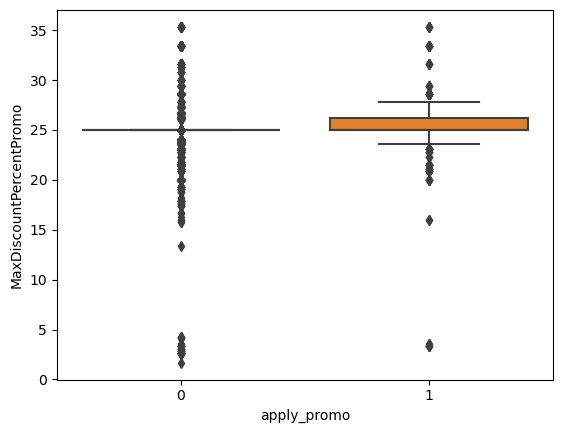

In [28]:
sns.boxplot(x='apply_promo', y='MaxDiscountPercentPromo', data=train_features_target_clean)

### Создание признака "максимум скидки менее 20% в промо", less20PersentDiscountPercentPromo

In [29]:
train_dataset['less20PercentDiscountPercentPromo'] = train_dataset['MaxDiscountPercentPromo'].apply(lambda x: 1 if x < 20 else 0)

In [30]:
train_dataset.less20PercentDiscountPercentPromo.value_counts()

less20PercentDiscountPercentPromo
0    27624
1      117
Name: count, dtype: int64

<Axes: xlabel='apply_promo', ylabel='OrderMinPrice'>

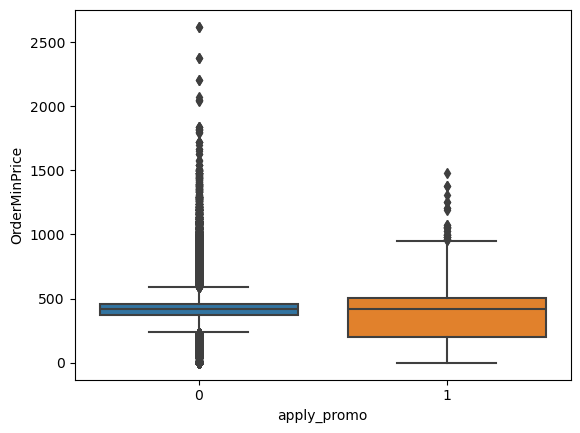

In [31]:
sns.boxplot(x='apply_promo', y='OrderMinPrice', data=train_features_target_clean)

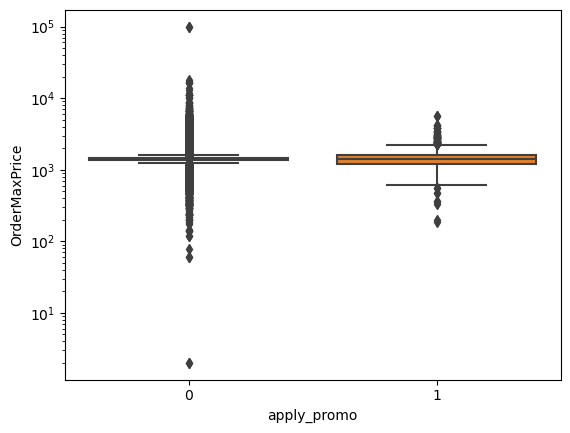

In [32]:
sns.boxplot(x='apply_promo', y='OrderMaxPrice', data=train_features_target_clean)
plt.yscale('log')

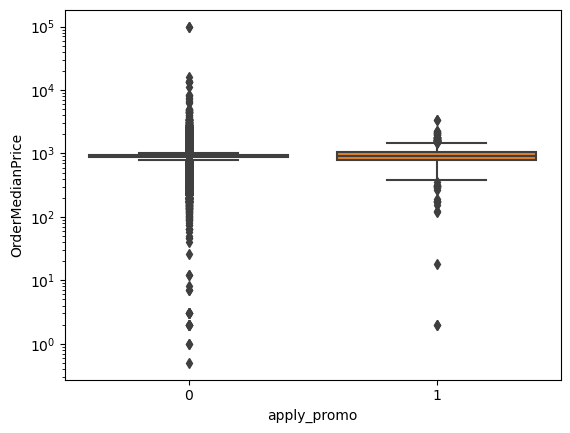

In [33]:
sns.boxplot(x='apply_promo', y='OrderMedianPrice', data=train_features_target_clean)
plt.yscale('log')

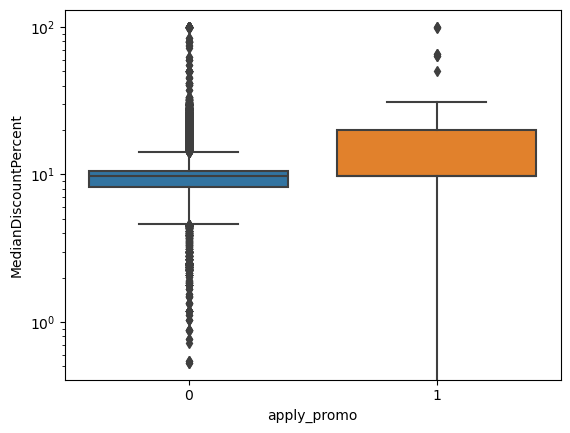

In [34]:
sns.boxplot(x='apply_promo', y='MedianDiscountPercent', data=train_features_target_clean)
plt.yscale('log')

<Axes: xlabel='apply_promo', ylabel='ProductUUIdCount'>

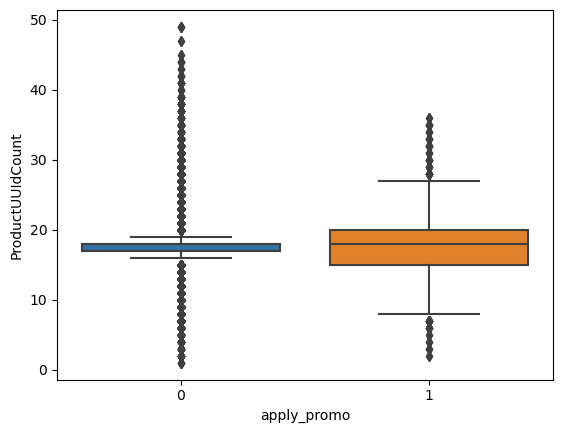

In [35]:
sns.boxplot(x='apply_promo', y='ProductUUIdCount', data=train_features_target_clean)

<Axes: xlabel='apply_promo', ylabel='ProductUUIdMedian'>

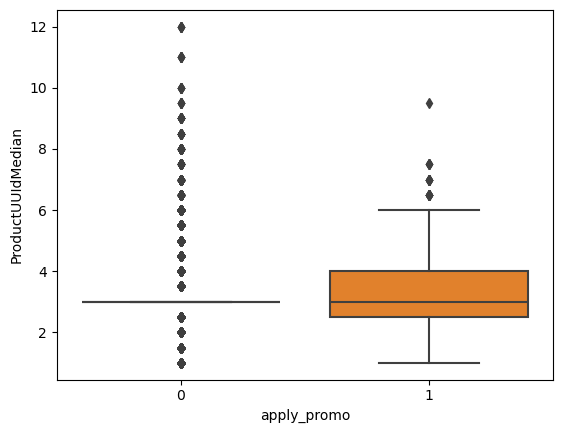

In [36]:
sns.boxplot(x='apply_promo', y='ProductUUIdMedian', data=train_features_target_clean)

In [37]:
promo_yes_train_features_target_clean.CategoryIdMain.value_counts()

CategoryIdMain
1.0    557
3.0    175
5.0     39
6.0     23
2.0     16
4.0     15
7.0      2
Name: count, dtype: int64

In [38]:
promo_no_train_features_target_clean.CategoryIdMain.value_counts()

CategoryIdMain
1.0    20006
3.0     4804
5.0      833
2.0      527
6.0      409
4.0      279
7.0       56
Name: count, dtype: int64

In [39]:
promo_yes_train_features_target_clean.CategoryIdMain.unique()

array([1., 6., 3., 5., 2., 4., 7.])

In [40]:
promo_no_train_features_target_clean = train_features_target_clean[train_features_target_clean['apply_promo'] == 0]
promo_no_train_features_target_clean.CategoryIdMain.unique()

array([1., 4., 2., 3., 6., 5., 7.])

In [41]:
promo_no_train_features_target_clean.CategoryIdMain.value_counts()

CategoryIdMain
1.0    20006
3.0     4804
5.0      833
2.0      527
6.0      409
4.0      279
7.0       56
Name: count, dtype: int64

### Создание признака "выбор категории товара 7", CategoryIdSevenMain

In [42]:
train_dataset['CategoryIdSevenMain'] = train_dataset['CategoryIdMain'].apply(lambda x: 1 if x == 7.0 else 0)

In [43]:
promo_yes_train_features_target_clean.NewClient1.value_counts()

NewClient1
0.0    826
1.0      1
Name: count, dtype: int64

In [44]:
promo_no_train_features_target_clean.NewClient1.value_counts()

NewClient1
0.0    26807
1.0      107
Name: count, dtype: int64

Ощущение, что промо используют те, кто имеет специфические адреса 'addressIdMain', 'deliverySectorIdMain' (по одной аномалии), кто типично имеет больше заказов 'ClientOrderMaxNumber', никогда не делает тип заказа номер 2 'OrderTypeMain', получает несколько большую медианную скидку по промо 'MedianDiscountPercent', но максимальную скидку более 20% 'MaxDiscountPercentPromo'

И не используют e', у кого средняя скидка и так довольнмалаяая 'MedianDiscountPercent', кто заказывает довольнпобольшего разных продуктов 'ProductUUIdCount' и 'ProductUUIdMedian', заказывает категорию товара номер 7 'CategoryIdMai

Всего создано три фичи. Их же создадим для датасета test_featuresомо.

### Выделяем новые признаки OrderTypeMainNotTwo, more20MedianDiscountPercentPromo, less20PersentDiscountPercentPromo, CategoryIdSevenMain

In [45]:
test_features_filled.shape
test_features_filled.head(2)

,Id,OrderType,DiscountPercentPromo,MedianDiscountPercentNovemberPromo,MaxDiscountPercentNovemberPromo,AvgDisc,MaxDisc,NewClient1,OrderMedianPrice,OrderMeanPrice,...,addressIdMain,deliverySectorIdMain,ClientOrderMaxNumber,CategoryIdMain,OrderTypeMain,WeekBalance,PlatformMain,ApplyedPromoBalance,MedianDiscountPercentPromo,MaxDiscountPercentPromo
0,7,2,25.031289,25.031289,25.031289,200.0,200,0.0,544.0,569.033333,...,0.0,0.0,49.0,1.0,1.0,0.666667,0.0,0.066667,14.460512,25.031289
1,5,2,28.612303,28.612303,28.612303,200.0,200,0.0,906.0,1091.827586,...,0.0,0.0,102.0,3.0,1.0,0.586207,1.0,0.465517,4.291845,30.030030


In [46]:
test_features_filled['OrderTypeMainNotTwo'] = test_features_filled['OrderTypeMain'].apply(check_not_two)
test_features_filled['more20MedianDiscountPercentPromo'] = test_features_filled['MedianDiscountPercent'].apply(lambda x: 1 if x > 20 else 0)
test_features_filled['less20PercentDiscountPercentPromo'] = test_features_filled['MaxDiscountPercentPromo'].apply(lambda x: 1 if x < 20 else 0)
test_features_filled['CategoryIdSevenMain'] = test_features_filled['CategoryIdMain'].apply(lambda x: 1 if x == 7.0 else 0)

In [47]:
test_features_filled.shape
test_features_filled.head(2)

,Id,OrderType,DiscountPercentPromo,MedianDiscountPercentNovemberPromo,MaxDiscountPercentNovemberPromo,AvgDisc,MaxDisc,NewClient1,OrderMedianPrice,OrderMeanPrice,...,OrderTypeMain,WeekBalance,PlatformMain,ApplyedPromoBalance,MedianDiscountPercentPromo,MaxDiscountPercentPromo,OrderTypeMainNotTwo,more20MedianDiscountPercentPromo,less20PercentDiscountPercentPromo,CategoryIdSevenMain
0,7,2,25.031289,25.031289,25.031289,200.0,200,0.0,544.0,569.033333,...,1.0,0.666667,0.0,0.066667,14.460512,25.031289,1,0,0,0
1,5,2,28.612303,28.612303,28.612303,200.0,200,0.0,906.0,1091.827586,...,1.0,0.586207,1.0,0.465517,4.291845,30.030030,1,0,0,0


In [48]:
test_features_filled.isnull().sum()

Id                                    0
OrderType                             0
DiscountPercentPromo                  0
MedianDiscountPercentNovemberPromo    0
MaxDiscountPercentNovemberPromo       0
AvgDisc                               0
MaxDisc                               0
NewClient1                            0
OrderMedianPrice                      0
OrderMeanPrice                        0
OrderMinPrice                         0
OrderMaxPrice                         0
MedianDiscountPercent                 0
ProductUUIdCount                      0
ProductUUIdMedian                     0
addressIdMain                         0
deliverySectorIdMain                  0
ClientOrderMaxNumber                  0
CategoryIdMain                        0
OrderTypeMain                         0
WeekBalance                           0
PlatformMain                          0
ApplyedPromoBalance                   0
MedianDiscountPercentPromo            0
MaxDiscountPercentPromo               0


In [49]:
test_features_filled.columns

Index(['Id', 'OrderType', 'DiscountPercentPromo',
       'MedianDiscountPercentNovemberPromo', 'MaxDiscountPercentNovemberPromo',
       'AvgDisc', 'MaxDisc', 'NewClient1', 'OrderMedianPrice',
       'OrderMeanPrice', 'OrderMinPrice', 'OrderMaxPrice',
       'MedianDiscountPercent', 'ProductUUIdCount', 'ProductUUIdMedian',
       'addressIdMain', 'deliverySectorIdMain', 'ClientOrderMaxNumber',
       'CategoryIdMain', 'OrderTypeMain', 'WeekBalance', 'PlatformMain',
       'ApplyedPromoBalance', 'MedianDiscountPercentPromo',
       'MaxDiscountPercentPromo', 'OrderTypeMainNotTwo',
       'more20MedianDiscountPercentPromo', 'less20PercentDiscountPercentPromo',
       'CategoryIdSevenMain'],
      dtype='object')

In [50]:
# test_features_filled = test_features_filled[['Id', 'OrderType', 'DiscountPercentPromo', 'MedianDiscountPercentNovemberPromo', 'MaxDiscountPercentNovemberPromo', 'OrderTypeMainNotTwo', 'more20MedianDiscountPercentPromo', 'less20PercentDiscountPercentPromo', 'CategoryIdSevenMain']]

In [51]:
# train_dataset = train_dataset[['Id', 'OrderType', 'DiscountPercentPromo', 'MedianDiscountPercentNovemberPromo', 'MaxDiscountPercentNovemberPromo', 'OrderTypeMainNotTwo', 'more20MedianDiscountPercentPromo', 'less20PercentDiscountPercentPromo', 'CategoryIdSevenMain', 'apply_promo']]

In [52]:
train_dataset.columns

Index(['Id', 'OrderType', 'apply_promo', 'DiscountPercentPromo',
       'MedianDiscountPercentNovemberPromo', 'MaxDiscountPercentNovemberPromo',
       'AvgDisc', 'MaxDisc', 'NewClient1', 'OrderMedianPrice',
       'OrderMeanPrice', 'OrderMinPrice', 'OrderMaxPrice',
       'MedianDiscountPercent', 'ProductUUIdCount', 'ProductUUIdMedian',
       'addressIdMain', 'deliverySectorIdMain', 'ClientOrderMaxNumber',
       'CategoryIdMain', 'OrderTypeMain', 'WeekBalance', 'PlatformMain',
       'ApplyedPromoBalance', 'MedianDiscountPercentPromo',
       'MaxDiscountPercentPromo', 'OrderTypeMainNotTwo',
       'more20MedianDiscountPercentPromo', 'less20PercentDiscountPercentPromo',
       'CategoryIdSevenMain'],
      dtype='object')

# Назначим трейн, вал и тест

In [53]:
df = train_dataset.copy()  # выбор тренировочного датасета

In [54]:
# df = train_features_target_clean.copy()

In [55]:
X = df.drop('apply_promo', axis=1)
y = df['apply_promo']

In [56]:
X

,Id,OrderType,DiscountPercentPromo,MedianDiscountPercentNovemberPromo,MaxDiscountPercentNovemberPromo,AvgDisc,MaxDisc,NewClient1,OrderMedianPrice,OrderMeanPrice,...,OrderTypeMain,WeekBalance,PlatformMain,ApplyedPromoBalance,MedianDiscountPercentPromo,MaxDiscountPercentPromo,OrderTypeMainNotTwo,more20MedianDiscountPercentPromo,less20PercentDiscountPercentPromo,CategoryIdSevenMain
0,7,2,28.612303,15.306952,28.612303,112.5,200,0.0,420.0,1853.727273,...,1.0,0.060606,1.0,0.000000,2.682180,25.031289,1,1,0,0
1,6,1,2.001601,15.306952,28.612303,112.5,200,0.0,420.0,1853.727273,...,1.0,0.060606,1.0,0.000000,2.682180,25.031289,1,1,0,0
2,5,2,25.031289,22.523651,25.031289,225.0,250,0.0,907.0,940.916118,...,1.0,0.322581,1.0,0.093750,13.678500,25.031289,1,0,0,0
3,5,1,20.016013,22.523651,25.031289,225.0,250,0.0,907.0,940.916118,...,1.0,0.322581,1.0,0.093750,13.678500,25.031289,1,0,0,0
4,6,2,4.291845,12.153929,20.016013,140.0,250,0.0,907.0,940.916118,...,1.0,0.322581,1.0,0.093750,13.678500,25.031289,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27736,5,2,25.031289,22.523651,25.031289,225.0,250,0.0,1806.0,1443.595238,...,3.0,0.238095,0.0,0.238095,2.503129,25.031289,1,0,0,0
27737,5,1,20.016013,22.523651,25.031289,225.0,250,0.0,1806.0,1443.595238,...,3.0,0.238095,0.0,0.238095,2.503129,25.031289,1,0,0,0
27738,6,2,2.503129,2.503129,2.503129,20.0,20,0.0,907.0,940.916118,...,1.0,0.322581,1.0,0.093750,13.678500,25.031289,1,0,0,0
27739,5,2,26.702270,23.359141,26.702270,225.0,250,0.0,907.0,940.916118,...,1.0,0.322581,1.0,0.093750,13.678500,25.031289,1,0,0,0


In [57]:
# разбиваем тренировочную выборку на тренировочную и валидационную в соотношении 75/25
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

In [58]:
# тестовую выборку не разибиваем
X_test = test_features_filled.copy()

In [59]:
print(f'Размерность тренировочной выборки: {X_train.shape}')
print(f'Размерность валидационной: {X_valid.shape}')
print(f'Размерность тестовой: {X_test.shape}')

Размерность тренировочной выборки: (20805, 29)
Размерность валидационной: (6936, 29)
Размерность тестовой: (6806, 29)


In [60]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [61]:
X_valid

array([[ 1.05195527,  0.83975479,  0.82905063, ..., -0.34526843,
        -0.06628095, -0.04497587],
       [-0.10774849,  0.83975479, -1.65699668, ...,  2.89629728,
        -0.06628095, -0.04497587],
       [ 1.05195527,  0.83975479,  0.82905063, ..., -0.34526843,
        -0.06628095, -0.04497587],
       ...,
       [ 1.05195527, -1.19082382,  0.27560045, ..., -0.34526843,
        -0.06628095, -0.04497587],
       [-0.10774849,  0.83975479, -1.65699668, ..., -0.34526843,
        -0.06628095, -0.04497587],
       [ 1.05195527,  0.83975479,  0.82905063, ..., -0.34526843,
        -0.06628095, -0.04497587]])

In [62]:
X_test

array([[ 1.05195527,  0.83975479,  0.82905063, ..., -0.34526843,
        -0.06628095, -0.04497587],
       [-1.26745225,  0.83975479,  1.22422585, ..., -0.34526843,
        -0.06628095, -0.04497587],
       [-0.10774849,  0.83975479, -1.65699668, ..., -0.34526843,
        -0.06628095, -0.04497587],
       ...,
       [-0.10774849, -1.19082382, -1.75651819, ..., -0.34526843,
        -0.06628095, -0.04497587],
       [ 1.05195527, -1.19082382, -0.01237337, ..., -0.34526843,
        -0.06628095, -0.04497587],
       [ 1.05195527, -1.19082382,  0.27560045, ..., -0.34526843,
        -0.06628095, -0.04497587]])

# Первая модель, линейная регрессия

In [63]:
lr_full = LinearRegression()  # создаём "пустую модель"
lr_full.fit(X_train, y_train)

LinearRegression()

In [64]:
# Посмотрим на признаки и расчитанные коэффиценты при них
lr_df = pd.DataFrame({'Признаки': X.columns, 'Коэффициенты': lr_full .coef_})

intercept_df = pd.DataFrame({'Признаки': ['Intercept'], 'Коэффициенты': lr_full .intercept_})
coef_df = pd.concat([lr_df, intercept_df], ignore_index=True)
coef_df

,Признаки,Коэффициенты
0,Id,-0.004100
1,OrderType,-0.002460
2,DiscountPercentPromo,0.001822
3,MedianDiscountPercentNovemberPromo,-0.018082
4,MaxDiscountPercentNovemberPromo,0.010351
5,AvgDisc,0.003464
6,MaxDisc,0.000165
7,NewClient1,0.000533
8,OrderMedianPrice,0.005252
9,OrderMeanPrice,-0.008109


In [65]:
# y_pred_full = lr_full.predict(X)  # посмотрим на результаты предсказания
y_pred_full = lr_full.predict(X_valid)
y_pred_full_df = pd.DataFrame({'y_pred_full': y_pred_full})
y_pred_full_df

,y_pred_full
0,0.093221
1,0.158140
2,0.004897
3,0.010663
4,0.003898
...,...
6931,0.026965
6932,0.139385
6933,0.014933
6934,0.006770


In [66]:
# Вывод метрик качества модели

model_to_check = y_pred_full  # Для удобства можно подставить переменную с моделью прямо сюда

print(f'MAE:          {mean_absolute_error(y_valid, model_to_check)}')  # MAE calculation
print(f'MAPE:         {mean_absolute_percentage_error(y_valid, model_to_check)}')  # MAPE calculation
print(f'MSE:          {mean_squared_error(y_valid, model_to_check)}')  # MSE calculation
print(f'RMSE:         {np.sqrt(mean_squared_error(y_valid, model_to_check))}')  # RMSE calculation
print(f'R^2:          {r2_score(y_valid, model_to_check)}')  # R^2 calculation

# Adjusted R^2 calculation
r2_pred_full = r2_score(y_valid, model_to_check)
n = X.shape[0]
k = X.shape[1]
adjusted_r2_pred_full = 1 - (1 - r2_pred_full) * (n - 1) / (n - k - 1)
print(f'Adjusted R^2: {adjusted_r2_pred_full}')

MAE:          0.057343734373190784
MAPE:         129753778371972.89
MSE:          0.028439565110962416
RMSE:         0.1686403424776006
R^2:          0.040207052913507346
Adjusted R^2: 0.03920261440657835


C:\Users\vsevo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='apply_promo', ylabel='Count'>

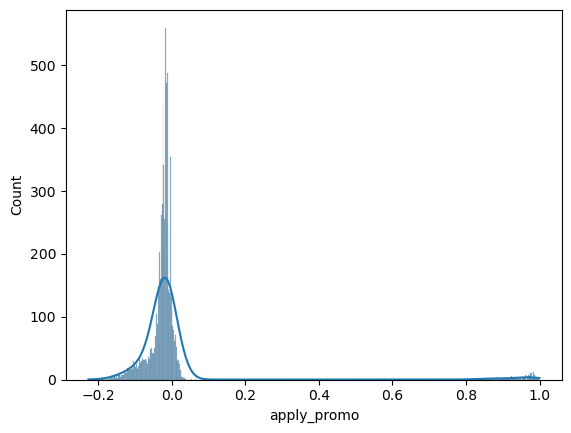

In [67]:
sns.histplot((y_valid-y_pred_full), kde=True)  # проведём анализ остатков. Распределены интересно

In [68]:
y_valid

17946    0
16038    0
13730    0
20257    0
23261    0
        ..
10562    0
19370    0
9651     0
20465    0
21027    0
Name: apply_promo, Length: 6936, dtype: int64

In [69]:
y_valid.unique()

array([0, 1], dtype=int64)

In [70]:
y_valid.value_counts()

apply_promo
0    6724
1     212
Name: count, dtype: int64

In [71]:
result = lr_full.predict(X_test)
result_df = pd.DataFrame({'apply_promo': result})
result_df
result_df.to_csv(dir + 'submit.csv', index=False)  # 0.71 качество

In [72]:
result_df.describe()

,apply_promo
count,6806.000000
mean,0.029309
std,0.032992
min,-0.071976
25%,0.011891
50%,0.020457
75%,0.035297
max,0.197815


In [73]:
# result_df['apply_promo'] = result_df['apply_promo'].apply(lambda x: max(x, 0))  # Вырежим нули
# Проверяем результат
# result_df.to_csv(dir + 'submit.csv', index=False)  # 0.6937 качество
# print(result_df.describe())

# Полиноминальная регрессионная модель

In [74]:
# Создаём генератор полиномиальных признаков, степень 2
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
# Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
# Генерируем полиномиальные признаки для валидационной выборки
X_valid_poly = poly.transform(X_valid)
# Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)

In [75]:
model = LinearRegression()

model.fit(X_train_poly, y_train)

y_train_predict_poly = model.predict(X_train_poly)
y_valid_predict_poly = model.predict(X_valid_poly)
y_test_predict_poly = model.predict(X_test_poly)

print(f"Train R^2: {r2_score(y_train, y_train_predict_poly)}")
print(f"Test R^2: {r2_score(y_valid, y_valid_predict_poly)}")  # Не стало получше

Train R^2: 0.0804579768308804
Test R^2: -2.717268107142018e+16


In [76]:
y_test_predict_poly

array([-0.01631764,  0.06609884,  0.01569593, ...,  0.02204046,
        0.11818142,  0.01985954])

In [77]:
result_df = pd.DataFrame({'apply_promo': y_test_predict_poly})
result_df.to_csv(dir + 'submit.csv', index=False)  # 0.67 качество
result_df

,apply_promo
0,-0.016318
1,0.066099
2,0.015696
3,0.019297
4,0.009742
...,...
6801,0.001649
6802,0.004604
6803,0.022040
6804,0.118181


# Создаём генератор полиномиальных признаков, степень 3
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)
# Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
# Генерируем полиномиальные признаки для валидационной выборки
X_valid_poly = poly.transform(X_valid)
# Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)

model = LinearRegression()

model.fit(X_train_poly, y_train)

y_train_predict_poly = model.predict(X_train_poly)
y_valid_predict_poly = model.predict(X_valid_poly)
y_test_predict_poly = model.predict(X_test_poly)

print(f"Train R^2: {r2_score(y_train, y_train_predict_poly)}")
print(f"Test R^2: {r2_score(y_valid, y_valid_predict_poly)}")  # переобучились

# записываем и выводим
result_df = pd.DataFrame({'apply_promo': y_test_predict_poly})
result_df.to_csv(dir + 'submit.csv', index=False)  # 0.56 качество
result_df

# L-2 регуляризованная модель

In [78]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)

PolynomialFeatures(include_bias=False)

In [79]:
# Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
# Генерируем полиномиальные признаки для валидационной выборки
X_valid_poly = poly.transform(X_valid)
# Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)

In [80]:
# Просто копируем признаки для тренировочной выборки
X_train_poly = X_train.copy()
# Просто копируем признаки для валидационной выборки
X_valid_poly = X_valid.copy()
# Просто копируем признаки для тестовой выборки
X_test_poly = X_test.copy()

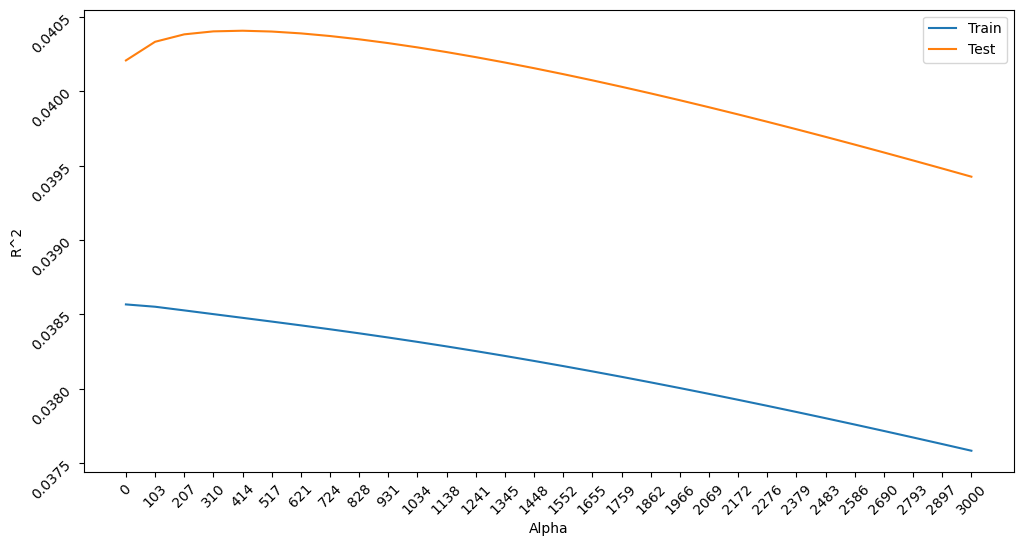

In [81]:
alpha_list = np.linspace(0, 3000, 30)

# Создаём пустые списки, в которые будем добавлять результаты
train_scores = []
valid_scores = []

for alpha in alpha_list:
    # Создаём объект класса линейной регрессии с L1-регуляризацией
    ridge_lr_poly = Ridge(alpha=alpha)
    # Обучаем модель
    ridge_lr_poly.fit(X_train_poly, y_train)
    # Делаем предсказание для тренировочной выборки
    y_train_predict_poly = ridge_lr_poly.predict(X_train_poly)
    # Делаем предсказание для тестовой выборки
    y_valid_predict_poly = ridge_lr_poly.predict(X_valid_poly)
    # Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(r2_score(y_train, y_train_predict_poly))
    valid_scores.append(r2_score(y_valid, y_valid_predict_poly))

plt.figure(figsize=(12, 6))
plt.plot(alpha_list, train_scores, label='Train')
plt.plot(alpha_list, valid_scores, label='Test')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.xticks(alpha_list)
plt.tick_params(rotation=45)
plt.legend()
plt.show()

In [82]:
# Находим максимальный R2-score для тренировочной выборки и соответствующее alpha
print(f"Оценка качества для модели с признаками: {X.columns}")

max_train_score_index = np.argmax(train_scores)
max_train_alpha = alpha_list[max_train_score_index]
print(f"Максимальный R2-score для тренировочной выборки: {train_scores[max_train_score_index]} при alpha: {max_train_alpha}")

# Находим максимальный R2-score для тестовой выборки и соответствующее alpha
max_valid_score_index = np.argmax(valid_scores)
max_valid_alpha = alpha_list[max_valid_score_index]
print(f"Максимальный R2-score для тестовой выборки: {valid_scores[max_valid_score_index]} при alpha: {max_valid_alpha}")

Оценка качества для модели с признаками: Index(['Id', 'OrderType', 'DiscountPercentPromo',
       'MedianDiscountPercentNovemberPromo', 'MaxDiscountPercentNovemberPromo',
       'AvgDisc', 'MaxDisc', 'NewClient1', 'OrderMedianPrice',
       'OrderMeanPrice', 'OrderMinPrice', 'OrderMaxPrice',
       'MedianDiscountPercent', 'ProductUUIdCount', 'ProductUUIdMedian',
       'addressIdMain', 'deliverySectorIdMain', 'ClientOrderMaxNumber',
       'CategoryIdMain', 'OrderTypeMain', 'WeekBalance', 'PlatformMain',
       'ApplyedPromoBalance', 'MedianDiscountPercentPromo',
       'MaxDiscountPercentPromo', 'OrderTypeMainNotTwo',
       'more20MedianDiscountPercentPromo', 'less20PercentDiscountPercentPromo',
       'CategoryIdSevenMain'],
      dtype='object')
Максимальный R2-score для тренировочной выборки: 0.038566470239151496 при alpha: 0.0
Максимальный R2-score для тестовой выборки: 0.04040674408132894 при alpha: 413.7931034482759


In [83]:
# Находим оптимальное значение alpha
optimal_alpha = alpha_list[np.argmax(valid_scores)]

# Обучаем модель на всех тренировочных данных (включая валидационные)
X_train_full_poly = np.vstack([X_train_poly, X_valid_poly])
y_train_full = np.concatenate([y_train, y_valid])
final_model = Ridge(alpha=optimal_alpha)
final_model.fit(X_train_full_poly, y_train_full)



Ridge(alpha=413.7931034482759)

In [84]:
# Прогнозирование на тестовых данных
y_test_pred_ridge = final_model.predict(X_test_poly)
y_test_pred_ridge

array([0.00692222, 0.09004643, 0.01560772, ..., 0.03610689, 0.09402846,
       0.01644676])

In [85]:
result_df = pd.DataFrame({'apply_promo': y_test_pred_ridge})
result_df.to_csv(dir + 'submit.csv', index=False)  # 0.72 качество
result_df

,apply_promo
0,0.006922
1,0.090046
2,0.015608
3,0.020624
4,0.056012
...,...
6801,0.022235
6802,0.026746
6803,0.036107
6804,0.094028


# Градиентный бустинг регрессионной модели

In [86]:
# Создаем объект класса градиентный бустинг для регрессии
gb = GradientBoostingRegressor(
    learning_rate=0.02,  # Темп обучения
    n_estimators=500,   # Число деревьев в ансамбле
    max_depth=6,         # Максимальная глубина деревьев
    random_state=42
)

In [87]:
# Обучаем модель на тренировочных данных
gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=6, n_estimators=500,
                          random_state=42)

In [88]:
# Формируем предсказание для валидационной выборки
gb_pred = gb.predict(X_valid)

In [89]:
# Оцениваем качество модели
rmse = np.sqrt(mean_squared_error(y_valid, gb_pred))
r2 = r2_score(y_valid, gb_pred)
n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print(f'RMSE:         {rmse}')
print(f'Adjusted R^2: {adjusted_r2}')

RMSE:         0.1546254931965442
Adjusted R^2: 0.1896520622871969


In [90]:
# Прогнозирование на тестовых данных
gb_pred = gb.predict(X_test)
gb_pred

array([-2.84911979e-05,  1.81797884e-02,  1.54325965e-02, ...,
        2.80060327e-02,  5.23930738e-02,  1.80784136e-02])

In [91]:
result_df = pd.DataFrame({'apply_promo': gb_pred})
result_df.to_csv(dir + 'submit.csv', index=False)  # 0.67 качество. Остановлюсь на этом
result_df

,apply_promo
0,-0.000028
1,0.018180
2,0.015433
3,0.018869
4,0.028857
...,...
6801,0.014004
6802,0.018096
6803,0.028006
6804,0.052393


# Реализация Grid search

In [92]:
# Игнорируем предупреждения, чтобы не захламлять вывод
warnings.filterwarnings('ignore', category=UserWarning)

# Определяем сетку гиперпараметров для перебора
param_grid = {
    'min_samples_leaf': range(5, 20),
    'max_features': ['sqrt', 'log2', None],  # Исключаем 'auto', так как он недопустим
    'max_depth': range(3, 15),
    'criterion': ['gini', 'entropy']
}

# Создаем объект GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    scoring='f1',
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

In [ ]:
%time grid_search.fit(X_train, y_train)

print(f"Наилучшее значение F1-score при кросс-валидации: {grid_search.best_score_}")
print(f"Наилучшие параметры: {grid_search.best_params_}")

In [ ]:
# Наилучшая найденная комбинация гиперпараметров сохраняется в атрибуте best_params_:
print(f"Наилучшие значения параметров: {grid_search.best_params_}")

In [ ]:
print(f"Наилучшая модель:\n{grid_search.best_estimator_}")

In [ ]:
y_test_pred = grid_search.predict(X_valid)
print(f"f1_score на тестовом наборе: {f1_score(y_valid, y_test_pred)}")

In [ ]:
# Прогнозирование на тестовых данных
gs_pred = grid_search.predict(X_test)
gs_pred

In [ ]:
result_df = pd.DataFrame({'apply_promo': gs_pred})
result_df.to_csv(dir + 'submit.csv', index=False)  # Точность - 0.51
result_df.apply_promo.value_counts()

# Стэкинг

In [ ]:
# Базовые модели
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42, max_iter=10000))
]

# Мета-модель
final_estimator = LogisticRegression(random_state=42)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1
)

# Обучение стэкинг-классификатора
%time stacking_clf.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred = stacking_clf.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("F1-score:", f1_score(y_valid, y_pred))
print("Classification Report:\n", classification_report(y_valid, y_pred))

In [ ]:
stacking_pred = stacking_clf.predict(X_valid)
stacking_pred

In [ ]:
result_df = pd.DataFrame({'apply_promo': stacking_pred})
result_df.to_csv(dir + 'submit.csv', index=False)  # Занятно, но проверять не буду. Данные такого формата не принимаются системой
result_df.apply_promo.value_counts()

# Заключение

Отличный опыт! Самый лучший результат был достигнут на датасете с заполенными пропусками.

Лучшая модификация датасета - добавление некоторых категориальных признаков для "дублирования" информации по существующим признакам.

Лучший классификатор - линейная регрессия с градиентным бустингом.

Стоит попробовать полносвязную нейросеть.